###### The Situation

You have just been hired as a data science intern at the US health Insurance company,A large private health provider in the United States.

######  The Assigment

The company is looking at updating thier insurance pricing model and want you to start a new one from scratch using a handfull of variables. If you are sucessful,they can reduce the compalxity of thier model whle maintaining it accuracy.
(The dataset you are working with has already been QA and cleaned).

######  The Objectives
* Perform an exploratory data analysis
* Build a simple linear regression model using this feature
* Predict insuarnce prices for new customers using this feature
* Make some recommendations

###### Project workflow
* Importation of packages
* Importation of dataset
* Data Wrangling
* Exploratory data analysis
* Correlational Analysis
* Regression Analysis
* Machine Learning
* Recommendations

* Importation of packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

* Importation of dataset

In [2]:
df = pd.read_csv(r'C:\Users\JAMES TECH\Downloads\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* Data Wrangling

* columns

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

All columns are ok

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

All dataypes are correct

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As said earlier,they are no missing values in dataset

* Exploratory data analysis

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* Age

In [11]:
sex_counts = df['sex'].value_counts().to_frame()
sex_counts

,count
sex,
male,676
female,662


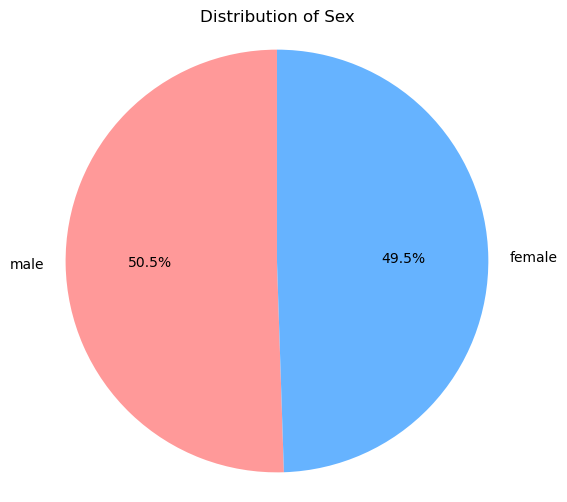

In [13]:
#plot
sex_counts = df['sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Sex')
plt.axis('equal')
plt.show()

They are more males than femals in the distribution

* Smoker

In [15]:
smoker_counts = df['smoker'].value_counts().to_frame()
smoker_counts

,count
smoker,
no,1064
yes,274


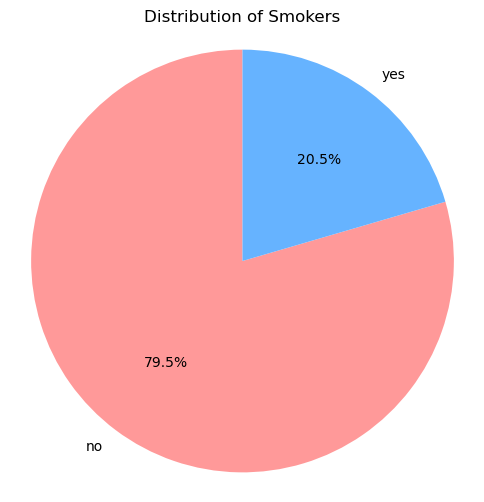

In [16]:

smoker_counts = df['smoker'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(smoker_counts.values, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Smokers')
plt.axis('equal') 
plt.show()

* They are more smokers than non smokers

* Region

In [17]:
reg_counts = df['region'].value_counts().to_frame()
reg_counts

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


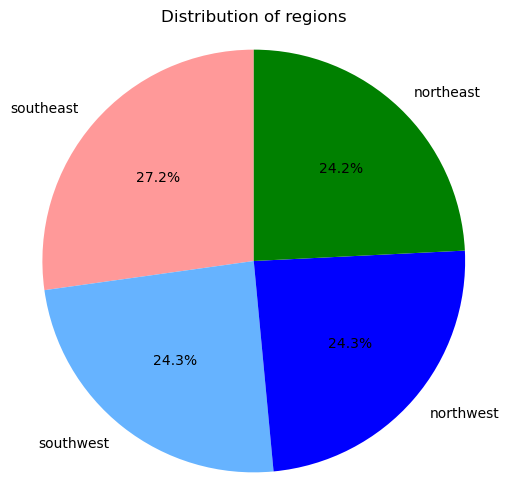

In [19]:

reg_counts = df['region'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(reg_counts.values, labels=reg_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','blue','green'])
plt.title('Distribution of regions')
plt.axis('equal')  
plt.show()

The southeast region has a higher number of people or a higher percentage than other regions

* Correlational Analysis

<Axes: xlabel='charges', ylabel='Count'>

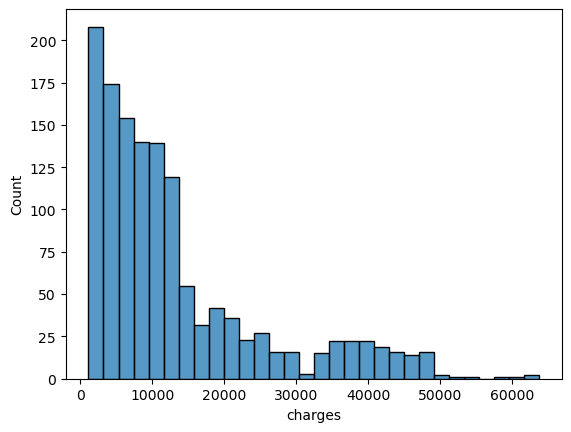

In [27]:
sns.histplot(df['charges'])

C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


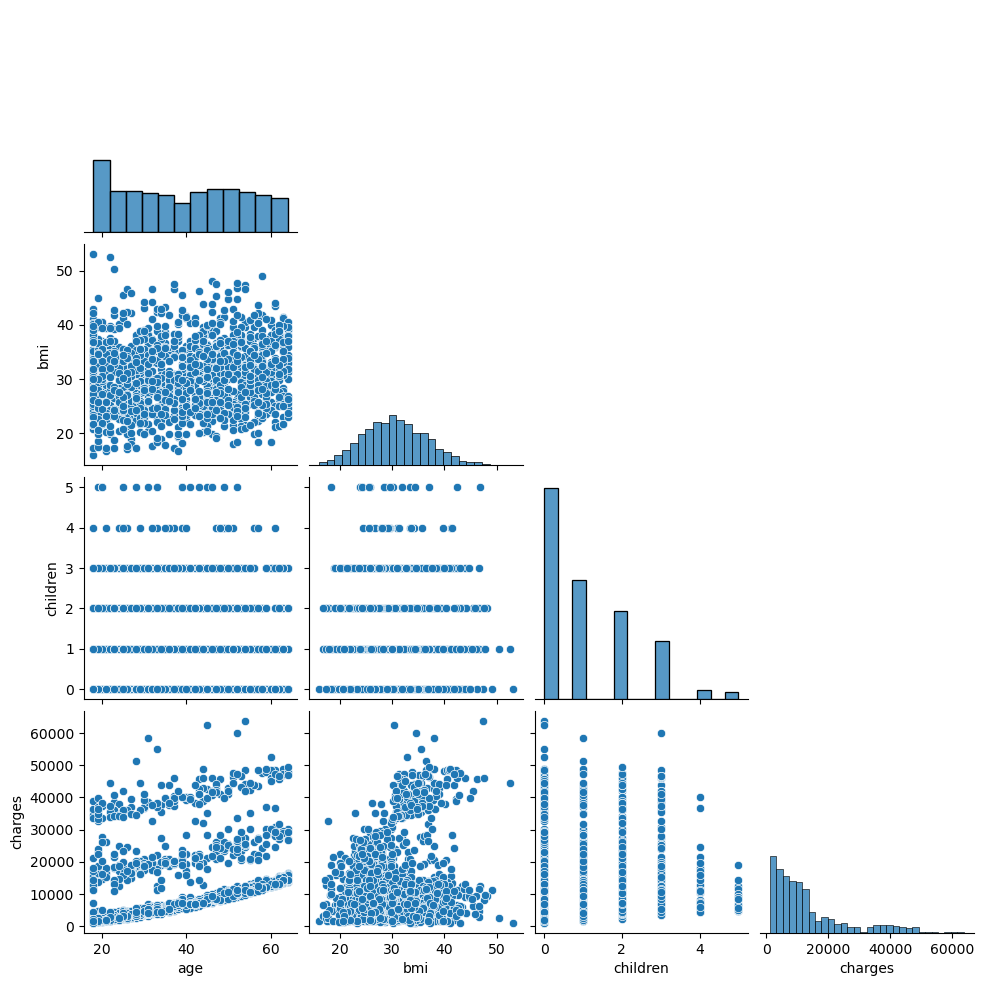

In [30]:
#pairplots

sns.pairplot(df, corner = True)

###### Key Notes;
* There is a positive correlation between charges and age
* There is a positive correlaton between charges and bmi
* There is a positive correlation between charges and children but it's not really clear.
* So, to realy know the extent of the relationships above,we will use correlation matrix

In [31]:
df.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


* From the matrix above, age is the most correlated feature and so we will use it to build our model.

Regression Analysis

Age and Charges

<Axes: xlabel='age', ylabel='charges'>

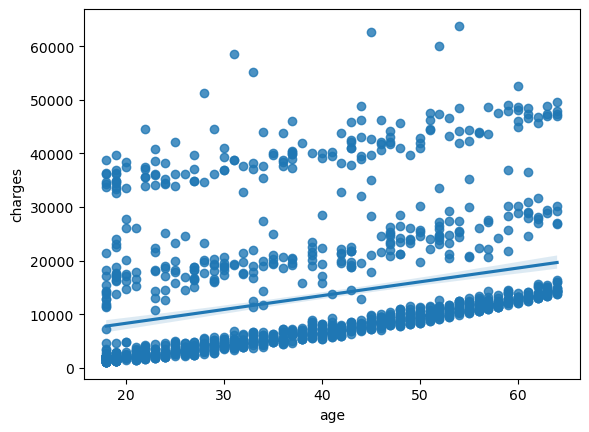

In [32]:
sns.regplot(x = 'age', y = 'charges',data = df)

* There is a good relationship bewteen age and charges. This means that the higher the age,the higher the charges and vice versa.

Bmi and Charges

<Axes: xlabel='bmi', ylabel='charges'>

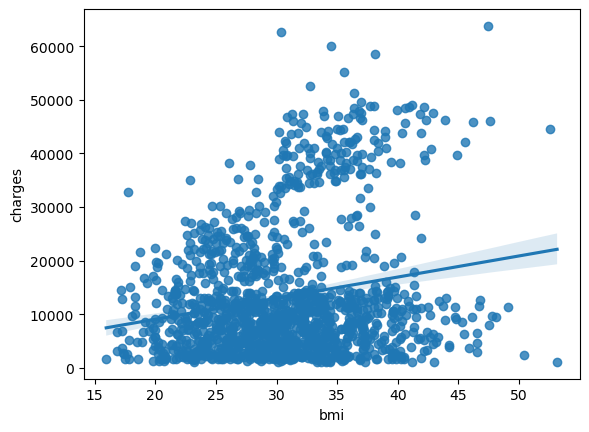

In [33]:
sns.regplot(x='bmi',y='charges',data=df)

* There is a positive relationship between bmi and charges.
The higher the bmi,the higher the charges and vice and versa

Children and charges

<Axes: xlabel='children', ylabel='charges'>

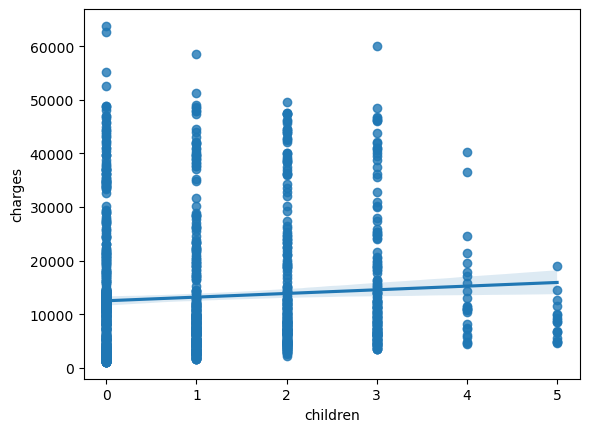

In [34]:
sns.regplot(x='children',y='charges',data = df)

The higher the number of children,the higher the charges

* Building our model using (age) as the highest correlated feature

In [35]:
x = sm.add_constant(df['age'])
y = df['charges']
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           4.89e-29
Time:                        20:26:38   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Building Prediction

In [47]:
customer_ages = [18,25,35,45,55]

x_predict = sm.add_constant(pd.DataFrame({'age':customer_ages}))

x_predict

,const,age
0,1.0,18
1,1.0,25
2,1.0,35
3,1.0,45
4,1.0,55


In [48]:
predictions = model.predict(x_predict)
predictions.name ='predictions'
predictions

0     7804.892142
1     9608.950473
2    12186.176659
3    14763.402846
4    17340.629033
Name: predictions, dtype: float64

In [57]:
(df
 .query('age in @customer_ages')
 .groupby('age')
 .agg({'charges':'mean'})
 .reset_index()
 .merge(predictions,left_index = True, right_index = True)
 .assign(
        error = lambda x: x['predictions']-x['charges'],
        pct_difference = lambda x:(x['error']/x['charges'])*100
 )
)

,age,charges,predictions,error,pct_difference
0,18,7086.217556,7804.892142,718.674586,10.141865
1,25,9838.365311,9608.950473,-229.414838,-2.331839
2,35,11307.182031,12186.176659,878.994628,7.773773
3,45,14830.199856,14763.402846,-66.797010,-0.450412
4,55,16164.545488,17340.629033,1176.083544,7.275698


<Axes: >

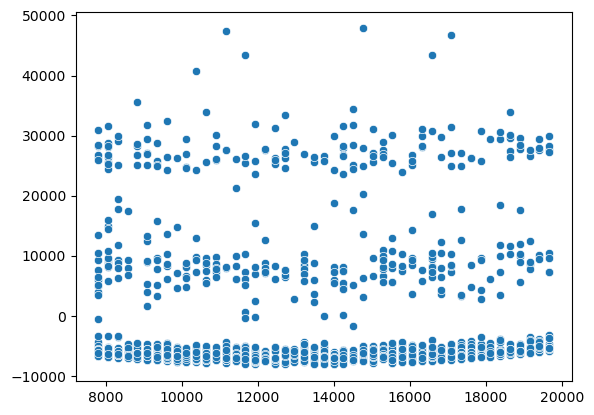

In [58]:
sns.scatterplot(x = model.predict(), y = model.resid)